In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df = pd.read_csv("/Users/zhangyuanzhuo/425 ML/card_transdata-1.csv")
df.head()

# Preprocess data
X = df.drop('fraud', axis=1)
y = df['fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, shuffle=False)

# Reshape data for LSTM input: [samples, time steps, features]
n_steps = 1
n_features = X.shape[1]
X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy}')

# Predictions
y_pred = model.predict_classes(X_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='True')
plt.plot(y_pred[:100], label='Predicted')
plt.title('True vs Predicted Fraudulent Transactions')
plt.xlabel('Sample')
plt.ylabel('Fraudulent')
plt.legend()
plt.show()


2024-03-19 21:26:03.303153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
15625/15625 [==============================] - 20s 1ms/step - loss: 0.0316 - accuracy: 0.9897
Epoch 2/10
15625/15625 [==============================] - 20s 1ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 3/10
15625/15625 [==============================] - 21s 1ms/step - loss: 0.0059 - accuracy: 0.9982
Epoch 4/10
15625/15625 [==============================] - 22s 1ms/step - loss: 0.0049 - accuracy: 0.9984
Epoch 5/10
15625/15625 [==============================] - 31s 2ms/step - loss: 0.0043 - accuracy: 0.9986
Epoch 6/10
15625/15625 [==============================] - 20s 1ms/step - loss: 0.0040 - accuracy: 0.9986
Epoch 7/10
15625/15625 [==============================] - 20s 1ms/step - loss: 0.0038 - accuracy: 0.9987
Epoch 8/10
15625/15625 [==============================] - 21s 1ms/step - loss: 0.0035 - accuracy: 0.9987
Epoch 9/10
15625/15625 [==============================] - 21s 1ms/step - loss: 0.0034 - accuracy: 0.9988
Epoch 10/10
15625/15625 [==============================

AttributeError: 'Sequential' object has no attribute 'predict_classes'

15625/15625 [==============================] - 13s 812us/step


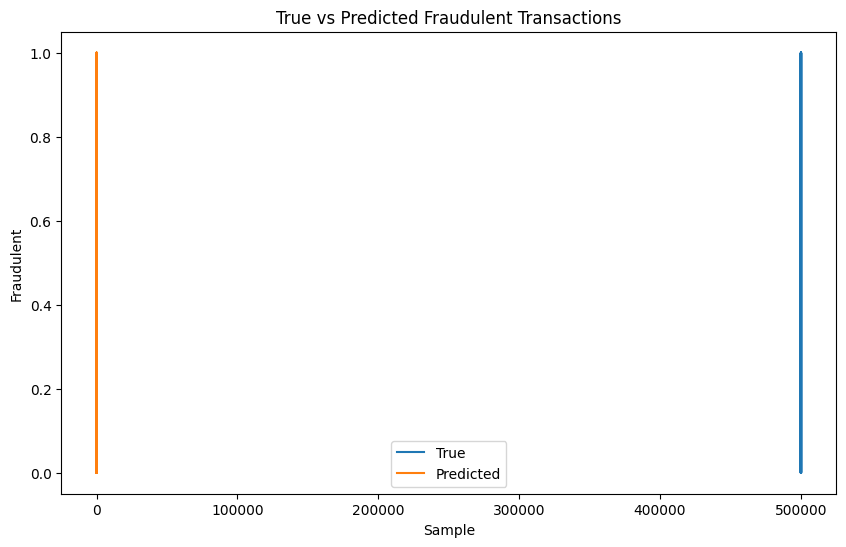

In [2]:
# Predict probabilities
y_pred_prob = model.predict(X_test)
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='True')
plt.plot(y_pred[:100], label='Predicted')
plt.title('True vs Predicted Fraudulent Transactions')
plt.xlabel('Sample')
plt.ylabel('Fraudulent')
plt.legend()
plt.show()
